<a href="https://colab.research.google.com/github/vladlesnyh/optimization/blob/main/%D0%9F%D1%80%D0%BE%D0%B1%D0%BB%D0%B5%D0%BC%D0%B0_%D1%80%D1%8E%D0%BA%D0%B7%D0%B0%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

В задаче о рюкзаке вам необходимо упаковать набор предметов с заданными значениями и размерами (например, весом или объемом) в контейнер максимальной вместимости. Если общий размер предметов превышает вместимость, вы не сможете упаковать их все. В этом случае проблема состоит в том, чтобы выбрать подмножество предметов максимальной общей стоимости, которые поместятся в контейнер.

В следующих разделах показано, как решить задачу о рюкзаке с помощью OR-Tools.

Пример

Вот графическое изображение задачи о рюкзаке:

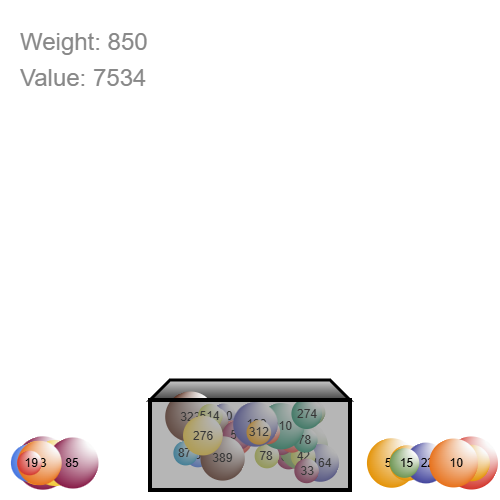

В приведенной выше анимации 50 предметов упакованы в корзину. Каждый предмет имеет ценность (номер на предмете) и вес (примерно пропорциональный площади предмета). Объявлено, что контейнер имеет вместимость 850 , и наша цель — найти набор предметов, который максимизирует общую ценность, не превышая вместимости.

Импортируйте библиотеки

Следующий код импортирует необходимые библиотеки.

In [3]:
!pip install ortools

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.7/27.7 MB 70.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 135.8/135.8 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 321.1/321.1 kB 21.3 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 5.29.5
    Uninstalling protobuf-5.29.5:
      Successfully uninstalled protobuf-5.29.5
  Attempting uninstall: absl-py
    Found existing installation: absl-py 1.4.0
    Uninstalling absl-py-1.4.0:
      Successfully uninstalled absl-py-1.4.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.19.0 requires protobuf!=4.21.0,!=4.21.1,!=4.21.2,!=4.21.3,!=4.21.4,!=4.21.5,<6.0.0dev,>=3.20.3, but you have protobuf 6.31.1 which is incompatible.
grpcio-status 1.71.2 requires protobuf<6.0dev,>=5.26.1, but you have protobuf 6.31.1 which is incompatibl

In [5]:
from ortools.algorithms.python import knapsack_solver

Исходные данные

Код ниже вводит исходные данные для нашей задачи.


In [6]:
values = [
    # fmt:off
  360, 83, 59, 130, 431, 67, 230, 52, 93, 125, 670, 892, 600, 38, 48, 147,
  78, 256, 63, 17, 120, 164, 432, 35, 92, 110, 22, 42, 50, 323, 514, 28,
  87, 73, 78, 15, 26, 78, 210, 36, 85, 189, 274, 43, 33, 10, 19, 389, 276,
  312
    # fmt:on
]
weights = [
    # fmt: off
  [7, 0, 30, 22, 80, 94, 11, 81, 70, 64, 59, 18, 0, 36, 3, 8, 15, 42, 9, 0,
   42, 47, 52, 32, 26, 48, 55, 6, 29, 84, 2, 4, 18, 56, 7, 29, 93, 44, 71,
   3, 86, 66, 31, 65, 0, 79, 20, 65, 52, 13],
    # fmt: on
]
capacities = [850]

Данные включают в себя следующее:

weights : вектор, содержащий веса элементов.

values : вектор, содержащий значения элементов.

capacities : вектор только с одной записью, вместимостью рюкзака.

Объявить решатель

Следующий код объявляет решатель рюкзака, специализированный решатель задач о рюкзаке.

In [7]:
solver = knapsack_solver.KnapsackSolver(
    knapsack_solver.SolverType.KNAPSACK_MULTIDIMENSION_BRANCH_AND_BOUND_SOLVER,
    "KnapsackExample",
)

Вызов решателя

Следующий код вызывает решатель и печатает решение.

In [13]:
solver.init(values, weights, capacities)
computed_value = solver.solve()
packed_items = []
packed_weights = []
total_weight = 0
print("Суммарное значениe элементов =", computed_value)
for i in range(len(values)):
    if solver.best_solution_contains(i):
        packed_items.append(i)
        packed_weights.append(weights[0][i])
        total_weight += weights[0][i]
print("Суммарный вес:", total_weight)
print("Сложенные вещи:", packed_items)
print("Сложенные веса:", packed_weights)

Суммарное значениe элементов = 7534
Суммарный вес: 850
Сложенные вещи: [0, 1, 3, 4, 6, 10, 11, 12, 14, 15, 16, 17, 18, 19, 21, 22, 24, 27, 28, 29, 30, 31, 32, 34, 38, 39, 41, 42, 44, 47, 48, 49]
Сложенные веса: [7, 0, 22, 80, 11, 59, 18, 0, 3, 8, 15, 42, 9, 0, 47, 52, 26, 6, 29, 84, 2, 4, 18, 7, 71, 3, 66, 31, 0, 65, 52, 13]
